<a href="https://colab.research.google.com/github/Imran012x/Hilsha_CoLab/blob/main/CNN_Resnet_MobileNet_EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import zipfile
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('')


**Importing the Dependencies**

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
Ilish_= os.listdir('ilish')
print(Ilish_[0:5])
print(Ilish_[-5:])

['1330.webp', '3292.webp', '476.webp', '1370.webp', '2792.webp']
['841.webp', '1858.webp', '4839.webp', '639.webp', '4711.webp']


In [7]:
Sardin_ = os.listdir('sardin')

In [8]:
Chandana_ = os.listdir('chandana')

In [ ]:
print('Ilish images:', len(Ilish_))
print('Sardin images:', len(Sardin_))
print('Chandana images:', len(Chandana_))

Ilish images: 6000
Sardin images: 6000
Chandana images: 6000


**Creating Labels for the two class of Images**

Ilish  -->   0

Sardin  -->  1

Chandana --> 2

In [9]:
# create the labels

Ilish_labels = [0]*6000

Sardin_labels = [1]*6000

Chandana_labels = [2]*6000

In [10]:
print(Ilish_labels[0:5])

print(Sardin_labels[0:5])

print(Chandana_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]


In [11]:
print(len(Ilish_labels))
print(len(Sardin_labels))
print(len(Chandana_labels))

6000
6000
6000


In [12]:
labels = Ilish_labels + Sardin_labels + Chandana_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

18000
[0, 0, 0, 0, 0]
[2, 2, 2, 2, 2]


**Displaying the Images**

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [13]:
# Convert images to numpy arrays
data = []
image_number = 6000  # Number of images to select from each type

# Process ilish images
ilish_path = 'ilish/'
for img_file in Ilish_[:image_number]:
    image = Image.open(ilish_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Process sardin images
sardin_path = 'sardin/'
for img_file in Sardin_[:image_number]:
    image = Image.open(sardin_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Process chandana images
chandana_path = 'chandana/'
for img_file in Chandana_[:image_number]:
    image = Image.open(chandana_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    print(image.shape)
    data.append(image)

# Now, `data` contains 4000 images from each type, for a total of 12,000 images.


Streaming output truncated to the last 5000 lines.
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 

In [ ]:
type(data)

list

In [ ]:
len(data)

18000

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
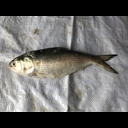

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(18000, 128, 128, 3)
(18000,)


In [ ]:
print(Y)

[0 0 0 ... 2 2 2]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(18000, 128, 128, 3) (12600, 128, 128, 3) (5400, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[122, 129, 144],
        [118, 125, 139],
        [124, 131, 146],
        ...,
        [ 88,  95, 112],
        [ 92, 100, 118],
        [ 94, 102, 120]],

       [[121, 128, 145],
        [125, 132, 147],
        [126, 133, 149],
        ...,
        [ 92,  98, 115],
        [ 92,  99, 115],
        [ 96, 105, 120]],

       [[121, 127, 144],
        [126, 133, 149],
        [127, 133, 149],
        ...,
        [ 94, 100, 117],
        [ 90,  97, 113],
        [ 96, 103, 119]],

       ...,

       [[110, 117, 133],
        [110, 116, 131],
        [114, 120, 135],
        ...,
        [ 88,  94, 110],
        [ 87,  94, 109],
        [ 86,  93, 107]],

       [[106, 112, 129],
        [110, 117, 132],
        [119, 126, 142],
        ...,
        [ 89,  96, 111],
        [ 89,  96, 111],
        [ 88,  95, 109]],

       [[104, 111, 126],
        [110, 116, 133],
        [114, 120, 139],
        ...,
        [ 88,  95, 110],
        [ 86,  92, 107],
        [ 86,  92, 108]]], dtype=uint8)
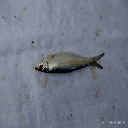

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.47843137, 0.50588235, 0.56470588],
        [0.4627451 , 0.49019608, 0.54509804],
        [0.48627451, 0.51372549, 0.57254902],
        ...,
        [0.34509804, 0.37254902, 0.43921569],
        [0.36078431, 0.39215686, 0.4627451 ],
        [0.36862745, 0.4       , 0.47058824]],

       [[0.4745098 , 0.50196078, 0.56862745],
        [0.49019608, 0.51764706, 0.57647059],
        [0.49411765, 0.52156863, 0.58431373],
        ...,
        [0.36078431, 0.38431373, 0.45098039],
        [0.36078431, 0.38823529, 0.45098039],
        [0.37647059, 0.41176471, 0.47058824]],

       [[0.4745098 , 0.49803922, 0.56470588],
        [0.49411765, 0.52156863, 0.58431373],
        [0.49803922, 0.52156863, 0.58431373],
        ...,
        [0.36862745, 0.39215686, 0.45882353],
        [0.35294118, 0.38039216, 0.44313725],
        [0.37647059, 0.40392157, 0.46666667]],

       ...,

       [[0.43137255, 0.45882353, 0.52156863],
        [0.43137255, 0.45490196, 0.51372549],
        [0.44705882, 0

#**CNN**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import keras
from keras import layers, models

def create_model(learning_rate, num_filters, kernel_size):
    model = models.Sequential()

    model.add(layers.Conv2D(num_filters, kernel_size, activation='relu', input_shape=(128,128, 3)))
    model.add(layers.MaxPooling2D())

    model.add(layers.Conv2D(num_filters * 2, kernel_size, activation='relu'))
    model.add(layers.MaxPooling2D())

    model.add(layers.Flatten())

    model.add(layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.5))

    model.add(layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dropout(0.5))


    model.add(layers.Dense(3, activation='softmax'))


    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
num_of_classes = 3

model = keras.Sequential()

model.add(keras.layers.Conv2D(87, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D())  #pool_size=(2,2)


model.add(layers.Conv2D(174, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D())


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))



model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 87)        │           2,436 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 87)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 174)         │         136,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 174)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 156600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │      10,022,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,163,495 (38.77 MB)

 Trainable params: 10,163,495 (38.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the neural network
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025686890659545365),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - acc: 0.6000 - loss: 0.7921 - val_acc: 0.7984 - val_loss: 0.4057
Epoch 2/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - acc: 0.7604 - loss: 0.4668 - val_acc: 0.8770 - val_loss: 0.2633
Epoch 3/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - acc: 0.8548 - loss: 0.3244 - val_acc: 0.9421 - val_loss: 0.1452
Epoch 4/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - acc: 0.9058 - loss: 0.2246 - val_acc: 0.9579 - val_loss: 0.1090
Epoch 5/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - acc: 0.9256 - loss: 0.1803 - val_acc: 0.9571 - val_loss: 0.0930
Epoch 6/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - acc: 0.9355 - loss: 0.1537 - val_acc: 0.9690 - val_loss: 0.0751
Epoch 7/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - acc: 0.9396 - loss: 0.1514 - val_acc: 0.9730 - val_loss: 0.0726
Epoch 8/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - acc: 0.9494 - loss: 0.1222 - val_acc: 0.9817 - val_loss: 0.0488
Epoch 9/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - acc: 0.9972 - loss: 0.0083
Train Accuracy = 0.9964285492897034


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - acc: 0.9825 - loss: 0.0483
Test Accuracy = 0.9842592477798462


In [ ]:
y_pred=model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
[1 0 2 ... 1 2 2]


In [ ]:
from sklearn.metrics import accuracy_score

# Example for classification predictions
accuracy = accuracy_score(Y_test, y_pred_classes)  # y_pred_classes should be class labels
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9842592592592593


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print (f"R² Score: {r2}")

R² Score: 0.9762689837789457


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

#conf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), y_pred_classes)
conf_matrix = confusion_matrix(Y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Confusion Matrix:
[[1775    0    0]
 [   0 1776   42]
 [   0   43 1764]]


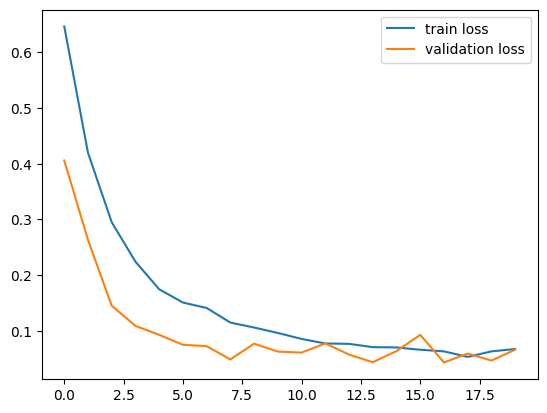

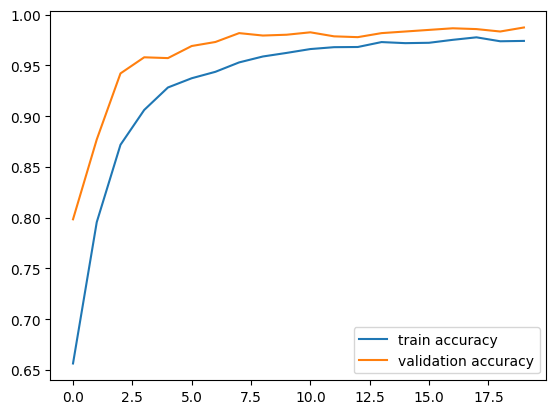

In [ ]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('CNN_Adam_model.h5')

#####RMSProp

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - acc: 0.9800 - loss: 0.0470 - val_acc: 0.9849 - val_loss: 0.0731
Epoch 2/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - acc: 0.9858 - loss: 0.0360 - val_acc: 0.9897 - val_loss: 0.0715
Epoch 3/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - acc: 0.9788 - loss: 0.0427 - val_acc: 0.9865 - val_loss: 0.0775
Epoch 4/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - acc: 0.9854 - loss: 0.0369 - val_acc: 0.9889 - val_loss: 0.0828
Epoch 5/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - acc: 0.9849 - loss: 0.0335 - val_acc: 0.9889 - val_loss: 0.0848
Epoch 6/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - acc: 0.9835 - loss: 0.0356 - val_acc: 0.9889 - val_loss: 0.0899
Epoch 7/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - acc: 0.9837 - loss: 0.0358 - val_acc: 0.9881 - val_loss: 0.0914
Epoch 8/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - acc: 0.9828 - loss: 0.0399 - val_acc: 0.9881 - val_loss: 0.0937
Epoch 9/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - acc: 0.9997 - loss: 0.0018
Train Accuracy = 0.9984920620918274


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - acc: 0.9894 - loss: 0.0484
Test Accuracy = 0.9883333444595337


In [ ]:
from sklearn.metrics import accuracy_score

# Example for classification predictions
accuracy = accuracy_score(Y_test, y_pred_classes)  # y_pred_classes should be class labels
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9842592592592593


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print (f"R² Score: {r2}")

R² Score: 0.9762689837789457


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

#conf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), y_pred_classes)
conf_matrix = confusion_matrix(Y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Confusion Matrix:
[[1775    0    0]
 [   0 1783   35]
 [   0   28 1779]]


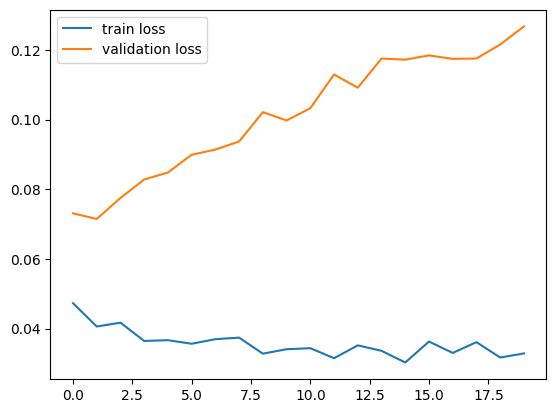

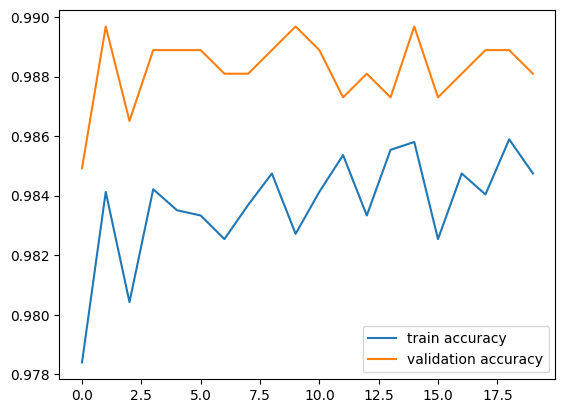

In [ ]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('CNN_RMS_model.h5')

#Optuna

In [ ]:
# import optuna

# def objective(trial):
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
#     num_filters = trial.suggest_int('num_filters', 16, 128)
#     kernel_size = trial.suggest_categorical('kernel_size', [3, 7])


#     model = create_model(learning_rate, num_filters, kernel_size)


#     #(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()
#     #x_train, x_val = x_train / 255.0, x_val / 255.0


#     model.fit(X_train_scaled, Y_train, epochs=8, validation_data=(X_test_scaled, Y_test), verbose=0)
#     score = model.evaluate(X_test_scaled, Y_test, verbose=0)
#     return score[1]


In [ ]:
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

In [ ]:
# best_params = study.best_params
# print("Best hyperparameters: ", best_params)

#**ResNet50**

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128,128,3))
convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21            │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_21[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
num_of_classes = 3

model = models.Sequential()


# model.add(layers.UpSampling2D((2,2)))
# model.add(layers.UpSampling2D((2,2)))
# model.add(layers.UpSampling2D((2,2)))


model.add(convolutional_base)


model.add(layers.Flatten())
model.add(layers.BatchNormalization())


model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())


model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())


model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())




model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:

# Now fit the model with resized images
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)


Epoch 1/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 62s 174ms/step - acc: 0.3951 - loss: 1.4287 - val_acc: 0.3452 - val_loss: 7.4016
Epoch 2/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 38s 107ms/step - acc: 0.5276 - loss: 1.0878 - val_acc: 0.4730 - val_loss: 1.3130
Epoch 3/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - acc: 0.6116 - loss: 0.8885 - val_acc: 0.8921 - val_loss: 0.4685
Epoch 4/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - acc: 0.6742 - loss: 0.7388 - val_acc: 0.9659 - val_loss: 0.2365
Epoch 5/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - acc: 0.7499 - loss: 0.6025 - val_acc: 0.9810 - val_loss: 0.1556
Epoch 6/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - acc: 0.8019 - loss: 0.4884 - val_acc: 0.9865 - val_loss: 0.1115
Epoch 7/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - acc: 0.8565 - loss: 0.3893 - val_acc: 0.9921 - val_loss: 0.0718
Epoch 8/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - acc: 0.8774 - loss: 0.3344 - val_acc: 0.9913 - val_loss: 0.0591
Epoch 9/20
355/355 ━━━━━━━━━━━━━

**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - acc: 0.9982 - loss: 0.0104
Train Accuracy = 0.9976984262466431


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - acc: 0.9936 - loss: 0.0267
Test Accuracy = 0.9933333396911621


In [ ]:
y_pred=model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)


169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step
[1 0 2 ... 1 2 2]


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print(f"R² Score: {r2}")

R² Score: 0.989111651380928


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)


#conf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), y_pred_classes)
conf_matrix = confusion_matrix(Y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step
Confusion Matrix:
[[1775    0    0]
 [   0 1818    0]
 [   1   35 1771]]


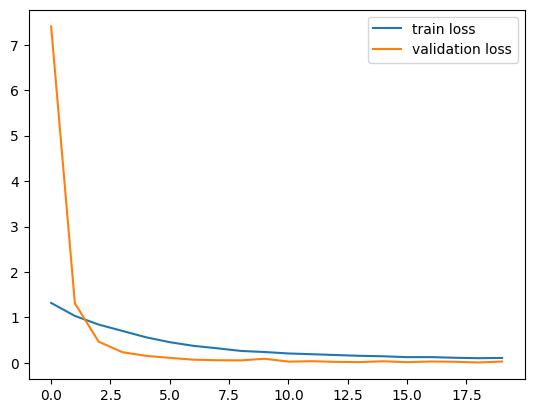

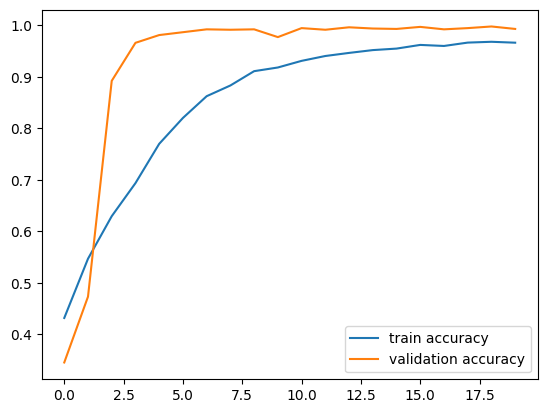

In [ ]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
# After training the model
model.save('resnet_Final_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [ ]:
#import pickle

#with open('fish_model.pkl', 'wb') as file:
 #   pickle.dump(model, file)

In [ ]:

# model.save('resnet_model.keras')


In [ ]:
# # from keras.models import load_model

# model = load_model('resnet_model.h5')
# print("Model loaded successfully!")


In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Specify the directory path
# base_path = 'ilish/'

# # Get the image file name from user input
# image_file_name = input('Enter the name of the image file (with extension): ')

# # Combine the base path with the user input to get the full path
# input_image_path = base_path + image_file_name

# # Debug: Print the full image path
# print(f"Trying to load image from: {input_image_path}")

# # Load the image
# input_image = cv2.imread(input_image_path)

# # Check if the image was loaded successfully
# if input_image is None:
#     print(f"Error: Unable to load image at {input_image_path}. Please check the file name and path.")
# else:
#     # Convert image from BGR to RGB for displaying with matplotlib
#     input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

#     # Display the image using matplotlib
#     plt.imshow(input_image_rgb)
#     plt.axis('off')  # Hide axis
#     plt.show()

#     # Resize the image and preprocess for prediction
#     input_image_resized = cv2.resize(input_image, (128, 128))
#     input_image_scaled = input_image_resized / 255.0
#     input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

#     # Make a prediction
#     input_prediction = model.predict(input_image_reshaped)
#     print(input_prediction)

#     # Get the predicted class label
#     input_pred_label = np.argmax(input_prediction)
#     print(input_pred_label)

#     # Display the result based on the predicted label
#     if input_pred_label == 0:
#         print('The Fish is Ilish')
#     elif input_pred_label == 1:
#         print('The Fish is Sardin')
#     else:
#         print('The Fish is Chandina')


#MobileNet

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
from tensorflow.keras.applications import MobileNetV2
# Model
convolutional_base = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
convolutional_base.summary()

Model: "mobilenetv2_1.00_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23            │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 64, 64, 32)     │            864 │ input_layer_23[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 64, 64, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 64, 64, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 64, 64, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 64, 64, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 64, 64, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 64, 64, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 64, 64, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 64, 64, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 65, 65, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 32, 32, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# Number of classes
num_classes = 3

# Load the MobileNetV2 model with input shape (128, 128, 3)
# Set `include_top=False` to exclude the default fully connected layer at the top
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Freeze the base model layers to retain pre-trained weights
base_model.trainable = False

# Add custom layers on top of the base model
model = models.Sequential([
    convolutional_base,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 32)                  │          40,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,315,811 (8.83 MB)

 Trainable params: 2,278,691 (8.69 MB)

 Non-trainable params: 37,120 (145.00 KB)

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:


# Now fit the model with resized images
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=25)


Epoch 1/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 66s 94ms/step - acc: 0.3664 - loss: 1.5093 - val_acc: 0.5810 - val_loss: 0.8949
Epoch 2/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - acc: 0.4731 - loss: 1.2312 - val_acc: 0.8040 - val_loss: 0.6500
Epoch 3/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - acc: 0.5630 - loss: 0.9985 - val_acc: 0.8722 - val_loss: 0.4784
Epoch 4/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - acc: 0.6488 - loss: 0.8353 - val_acc: 0.8960 - val_loss: 0.3328
Epoch 5/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - acc: 0.6999 - loss: 0.7107 - val_acc: 0.9024 - val_loss: 0.2943
Epoch 6/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - acc: 0.7596 - loss: 0.5895 - val_acc: 0.9571 - val_loss: 0.1914
Epoch 7/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - acc: 0.8053 - loss: 0.4964 - val_acc: 0.9659 - val_loss: 0.1390
Epoch 8/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - acc: 0.8355 - loss: 0.4268 - val_acc: 0.9563 - val_loss: 0.1326
Epoch 9/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

394/394 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - acc: 0.9997 - loss: 0.0028
Train Accuracy = 0.9987301826477051


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.9902 - loss: 0.0311
Test Accuracy = 0.9912962913513184


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print(f"R² Score: {r2}")

R² Score: 0.989111651380928


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)


#conf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), y_pred_classes)
conf_matrix = confusion_matrix(Y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


169/169 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step
Confusion Matrix:
[[1775    0    0]
 [   0 1808   10]
 [   0   37 1770]]


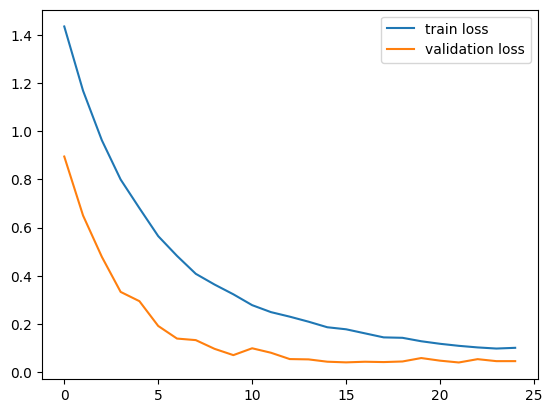

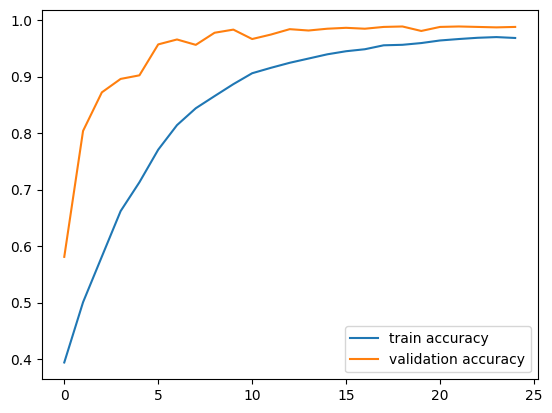

In [ ]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:

model.save('mobileNet_model.h5')


In [ ]:
from keras.models import load_model


# model = load_model('fish_model.h5')
model = load_model('resnet_Final_model.h5')
print("Model loaded successfully!")

Model loaded successfully!


Enter the name of the image file (with extension): 6.webp
Trying to load image from: ilish/6.webp


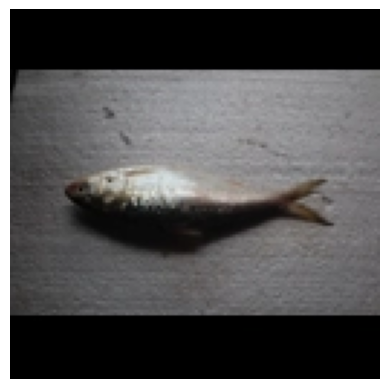

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[9.9813986e-01 7.0590404e-04 1.1542325e-03]]
0
The Fish is Ilish


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Specify the directory path
base_path = 'ilish/'

# Get the image file name from user input
image_file_name = input('Enter the name of the image file (with extension): ')

# Combine the base path with the user input to get the full path
input_image_path = base_path + image_file_name

# Debug: Print the full image path
print(f"Trying to load image from: {input_image_path}")

# Load the image
input_image = cv2.imread(input_image_path)

# Check if the image was loaded successfully
if input_image is None:
    print(f"Error: Unable to load image at {input_image_path}. Please check the file name and path.")
else:
    # Convert image from BGR to RGB for displaying with matplotlib
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(input_image_rgb)
    plt.axis('off')  # Hide axis
    plt.show()

    # Resize the image and preprocess for prediction
    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

    # Make a prediction
    input_prediction = model.predict(input_image_reshaped)
    print(input_prediction)

    # Get the predicted class label
    input_pred_label = np.argmax(input_prediction)
    print(input_pred_label)

    # Display the result based on the predicted label
    if input_pred_label == 0:
        print('The Fish is Ilish')
    elif input_pred_label == 1:
        print('The Fish is Sardin')
    else:
        print('The Fish is Chandana')


#EfficientNetB0

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import optimizers

# Load EfficientNetB0 as the base model
convolutional_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
convolutional_base.summary()


In [ ]:
num_of_classes = 3

# Initialize a sequential model
model = models.Sequential()

# Add the EfficientNet base model (without the top layer)
model.add(convolutional_base)

# Flatten the output of EfficientNet
model.add(layers.Flatten())
model.add(layers.BatchNormalization())

# Dense layers with dropout and batch normalization
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

# Output layer with softmax activation
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
# Compile the model with an optimizer
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Now fit the model with resized images
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

In [ ]:

# Evaluate the model on training and test sets
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)
